In [37]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
# Setting the parameter that control the style of plots.

sns.set_style('darkgrid')

plt.rcParams['font.size'] = 15

plt.rcParams['figure.figsize'] = (10,7)


In [39]:
# Import dataset.

data = pd.read_csv("C:\\Users\\Ravi\\Desktop\\world-happiness-report-2021.csv")
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [40]:
# selecting useful columns.

data_columns= ['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy'
              ,'Freedom to make life choices','Generosity','Perceptions of corruption']

In [41]:
# Creating a new dataframe based on selected columns.

data  = data[data_columns].copy()
data.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [42]:
# Renaming the column names.

happy_df = data.rename({'Country name':'country_name','Regional indicator':'regional_indicator','Ladder score':'happyness_score',
                       'Logged GDP per capita':'logged_GDP_per_capita','Social support':'social_support','Healthy life expectancy':
                       'healthy_life_expectancy','Freedom to make life choices':'freedom_to_make_life_choices','Generosity':
                       'generosity','Perceptions of corruption':'perceptions_of_corruption'}, axis=1)

In [43]:
happy_df.head()

,country_name,regional_indicator,happyness_score,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [44]:
# Checking whether there are null values in the DataFrame.

happy_df.isnull().sum()

country_name                    0
regional_indicator              0
happyness_score                 0
logged_GDP_per_capita           0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

Text(0, 0.5, 'GDP per Capita')

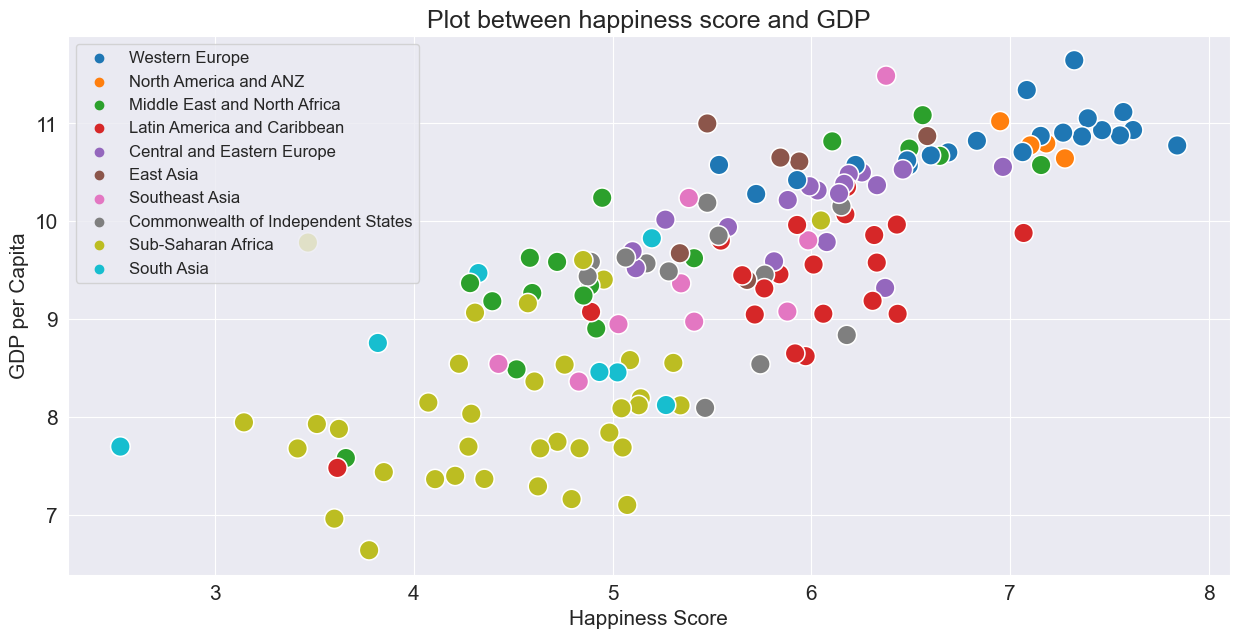

In [46]:
# Creating a scatter plot between happyness score and GDP.


plt.rcParams['figure.figsize'] = (15, 7)
plt.title('Plot between happiness score and GDP')
sns.scatterplot(x=happy_df['happyness_score'], y=happy_df['logged_GDP_per_capita'], hue=happy_df['regional_indicator'], s = 200)
plt.legend(loc = 'upper left', fontsize = 12)
plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')

In [47]:
# Distribution of  GDP by region.

gdp_region = happy_df.groupby('regional_indicator')['logged_GDP_per_capita'].sum()
gdp_region

regional_indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: logged_GDP_per_capita, dtype: float64

Text(0, 0.5, ' ')

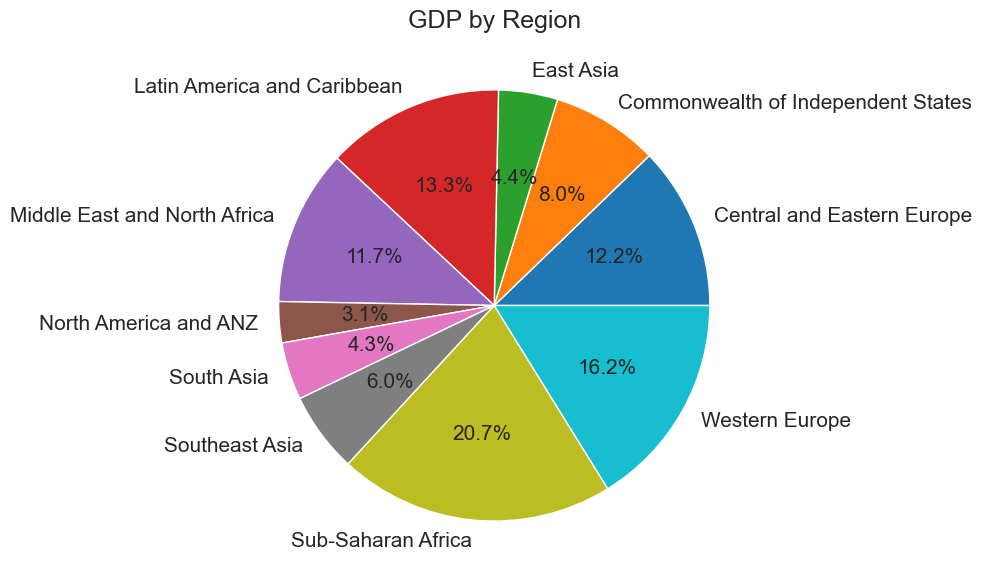

In [48]:
# Creating a pie plot for distribution of GDP by region.

gdp_region.plot.pie(autopct = "%1.1f%%")
plt.title('GDP by Region')
plt.ylabel(' ')

In [49]:
# Finding total number of countries in each region.

total_country = happy_df.groupby('regional_indicator')[['country_name']].count()
total_country

,country_name
regional_indicator,
Central and Eastern Europe,17
Commonwealth of Independent States,12
East Asia,6
Latin America and Caribbean,20
Middle East and North Africa,17
North America and ANZ,4
South Asia,7
Southeast Asia,9
Sub-Saharan Africa,36


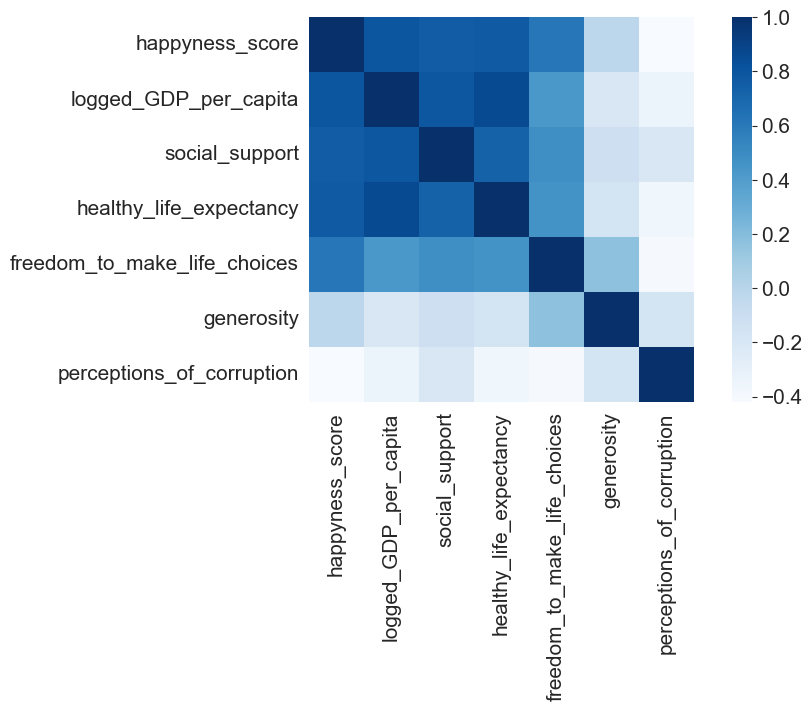

In [50]:
# Creating Correlated map.


numeric_columns = happy_df.select_dtypes(include=['number'])
corr = numeric_columns.corr(method="pearson")
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr, cmap='Blues', square=True, ax=ax)
plt.show()


In [71]:
# Finding corruption based on different regions.

Corruption = happy_df.groupby('regional_indicator')[['perceptions_of_corruption']].mean()
Corruption

,perceptions_of_corruption
regional_indicator,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


<BarContainer object of 10 artists>

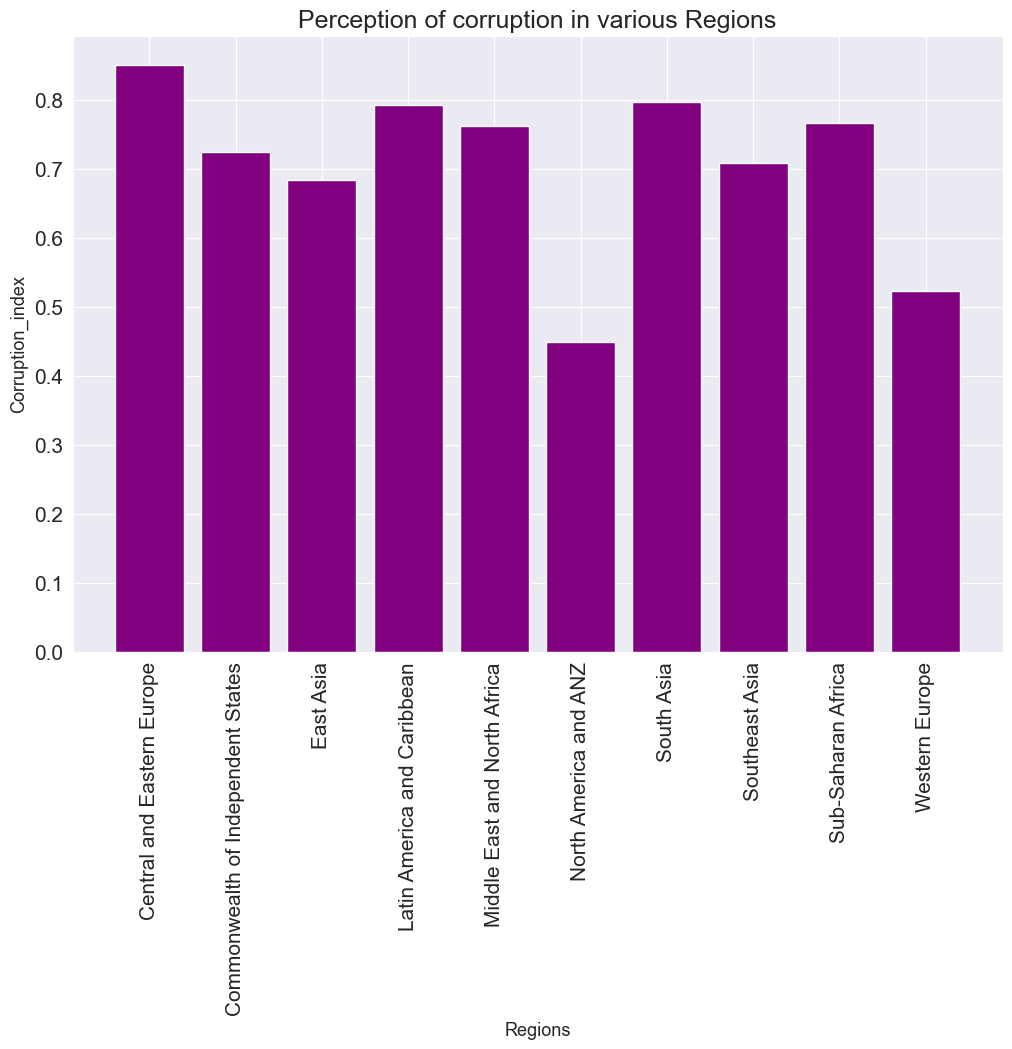

In [78]:
# Creating a bar plot to visualize.
plt.rcParams['figure.figsize'] = (12,8)
plt.title('Perception of corruption in various Regions')
plt.xlabel('Regions', fontsize= 13)
plt.ylabel('Corruption_index', fontsize= 13)
plt.xticks(rotation = 90)
plt.bar(Corruption.index, Corruption.perceptions_of_corruption , color = 'purple' )


In [84]:
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

C:\Users\Ravi\AppData\Local\Temp\ipykernel_1132\3205621804.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(top_10.country_name, rotation=90)
C:\Users\Ravi\AppData\Local\Temp\ipykernel_1132\3205621804.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(bottom_10.country_name, rotation=90)


Text(0, 0.5, ' Life expectancy')

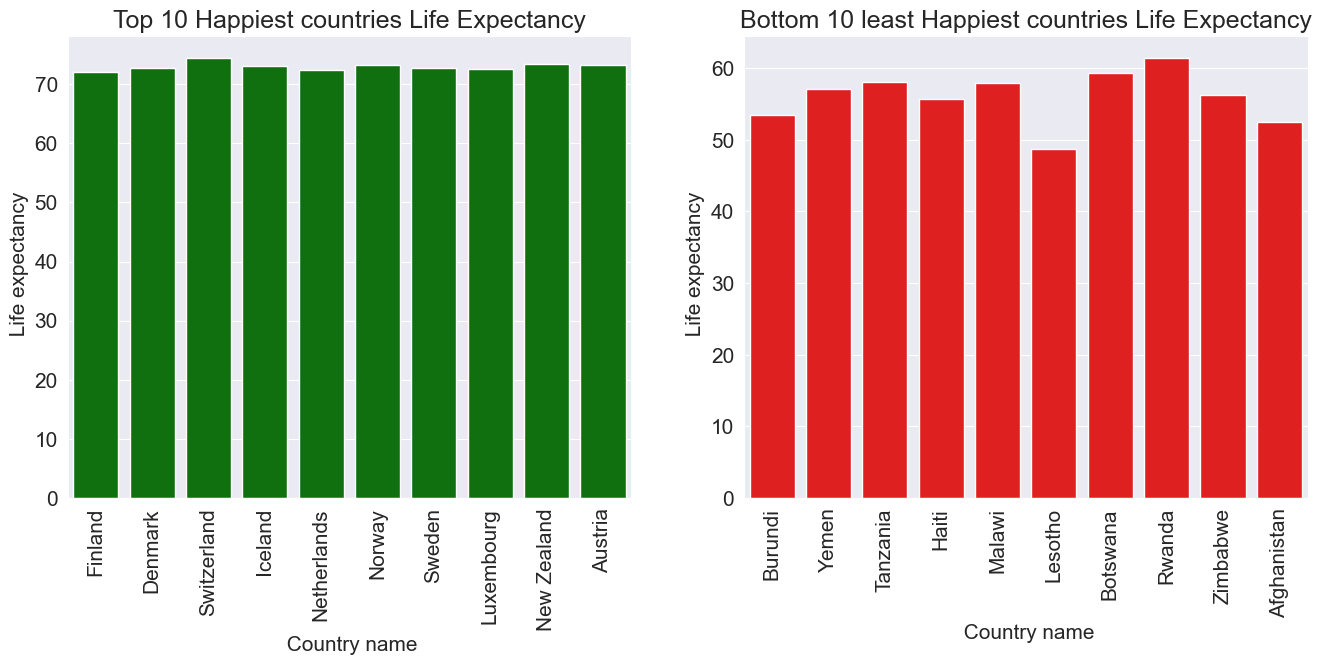

In [109]:
# Creating bar charts for the Life Expectancy in  Happiest and least happiest countries .

fig, ax = plt.subplots(1,2,figsize=(16, 6))

ax[0].set_title('Top 10 Happiest countries Life Expectancy')
ax[0].set_xticklabels(top_10.country_name, rotation=90)

sns.barplot(x=top_10.country_name, y = top_10.healthy_life_expectancy, color = 'green', ax = ax[0])

ax[0].set_xlabel(' Country name')
ax[0].set_ylabel(' Life expectancy')




ax[1].set_title('Bottom 10 least Happiest countries Life Expectancy')
ax[1].set_xticklabels(bottom_10.country_name, rotation=90)

sns.barplot(x=bottom_10.country_name, y = bottom_10.healthy_life_expectancy ,color = 'red', ax =ax[1])

ax[1].set_xlabel(' Country name')
ax[1].set_ylabel(' Life expectancy')

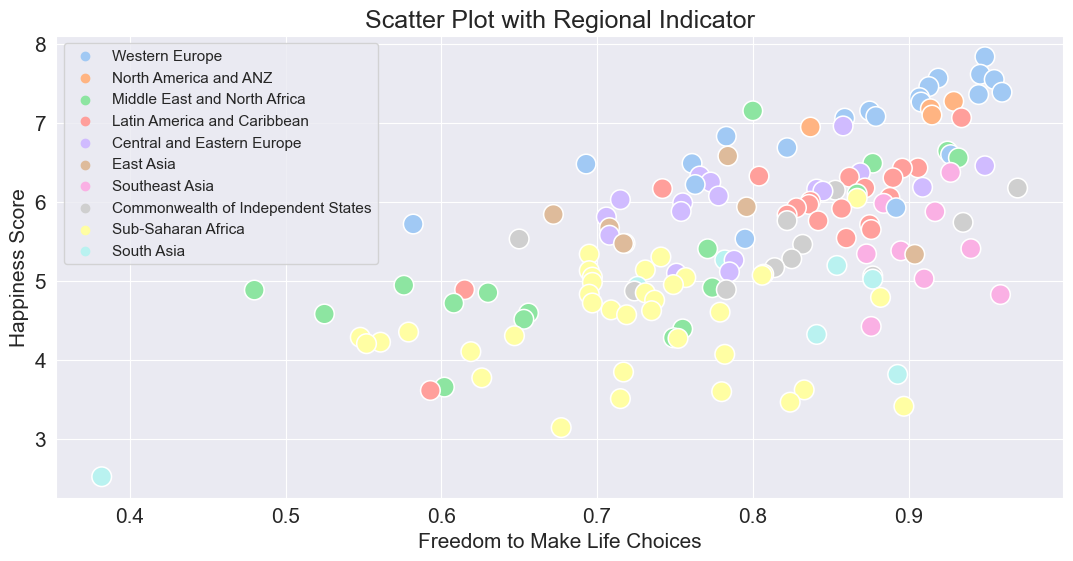

In [121]:
# Creating a scatter plot.

plt.figure(figsize=(13, 6))
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.title('Scatter Plot with Regional Indicator')
sns.scatterplot(x='freedom_to_make_life_choices', y='happyness_score', hue='regional_indicator', s=200, data=happy_df)
plt.legend(loc = 'upper left', fontsize = 11)





In [124]:
# Finding countries with least corruption.

country = happy_df.sort_values(by='perceptions_of_corruption')
country.head(10)

,country_name,regional_indicator,happyness_score,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
31,Singapore,Southeast Asia,6.377,11.488,0.915,76.953,0.927,-0.018,0.082
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
6,Sweden,Western Europe,7.363,10.867,0.934,72.700,0.945,0.086,0.237
8,New Zealand,North America and ANZ,7.277,10.643,0.948,73.400,0.929,0.134,0.242
5,Norway,Western Europe,7.392,11.053,0.954,73.300,0.960,0.093,0.270
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338
14,Ireland,Western Europe,7.085,11.342,0.947,72.400,0.879,0.077,0.363


In [126]:
# Finding countries with highest corruption.

country = happy_df.sort_values(by='perceptions_of_corruption', ascending= False)
country.head(10)

,country_name,regional_indicator,happyness_score,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
59,Croatia,Central and Eastern Europe,5.882,10.217,0.924,70.799,0.754,-0.118,0.939
45,Romania,Central and Eastern Europe,6.140,10.284,0.832,67.355,0.845,-0.219,0.938
87,Bulgaria,Central and Eastern Europe,5.266,10.016,0.931,67.000,0.788,-0.096,0.932
63,Bosnia and Herzegovina,Central and Eastern Europe,5.813,9.590,0.870,68.098,0.706,0.113,0.931
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924
109,Ukraine,Commonwealth of Independent States,4.875,9.436,0.888,64.902,0.724,-0.011,0.924
64,Moldova,Commonwealth of Independent States,5.766,9.454,0.857,65.699,0.822,-0.079,0.918
32,Kosovo,Central and Eastern Europe,6.372,9.318,0.821,63.813,0.869,0.257,0.917
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
33,Slovakia,Central and Eastern Europe,6.331,10.369,0.936,69.201,0.766,-0.124,0.911


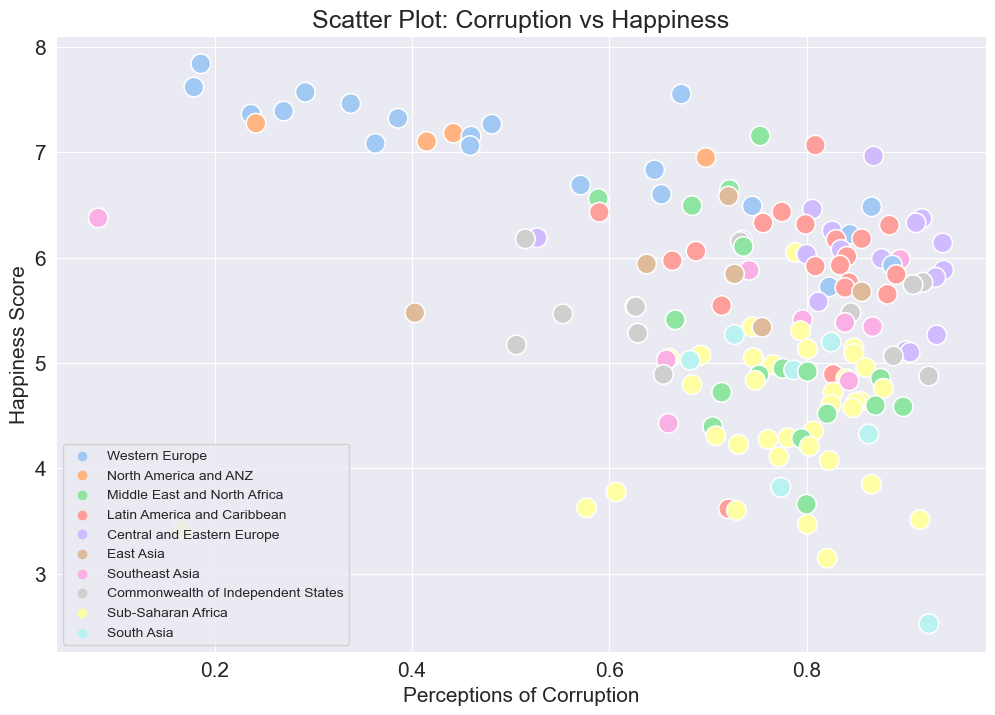

In [130]:
# Create a scatter plot for corruption vs happiness

plt.xlabel('Perceptions of Corruption')
plt.ylabel('Happiness Score')
plt.title('Scatter Plot: Corruption vs Happiness')
sns.scatterplot(x='perceptions_of_corruption', y='happyness_score', data=happy_df, hue ='regional_indicator', s=200)
plt.legend(loc = 'lower left', fontsize = 10)